# INICIA LA PRIMERA PARTE DEL PROYECTO

In [1]:
# #Definiendo los requisitos del filtro
import numpy as np
from scipy.signal import butter,filtfilt
# Filter requirements.
T = 10.0         # Sample Period
fs = 60.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order =2      # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

In [2]:
import numpy as np

# Define a time vector 't' from 0 to 1 with a certain sampling frequency
# For example, creating 1000 evenly spaced points from 0 to 1:
t = np.linspace(0, 10, 1000)
sig = np.sin(1.2 * 2 * np.pi * t)
noise = 1.5 * np.cos(9 * 2 * np.pi * t) + 0.5 * np.sin(12.0 * 2 * np.pi * t)

In [3]:
#creacion de algunos datos de muestras de ruido
sig = np.sin(1.2* 2 * np.pi * t)

noise = 1.5 * np.cos(9 * 2 * np.pi * t) + 0.5 * np.sin(12.0 * 2 * np.pi * t)
data = sig + noise

#Implementación de filtros usando scipy
def butter_lowpass_filter(data, cutoff, fs, order):
      normal_cutoff = cutoff / nyq
      # get the filter coefficients
      b, a = butter(order, normal_cutoff, btype ='low', analog = False)
      y = filtfilt (b, a ,data)
      return y

In [4]:
import plotly.graph_objs as go

In [5]:
   #Implementación de filtros usando scipy
   y = butter_lowpass_filter(data, cutoff, fs, order)
   fig = go.Figure()
   fig.add_trace(go.Scatter(
              y = data,
              line=dict(shape='spline'),
              name='signal with noise'
               ))
   fig.add_trace(go.Scatter(
               y = y,
              line=dict(shape='spline'),
              name='filtered signal'
              ))
   fig.show()


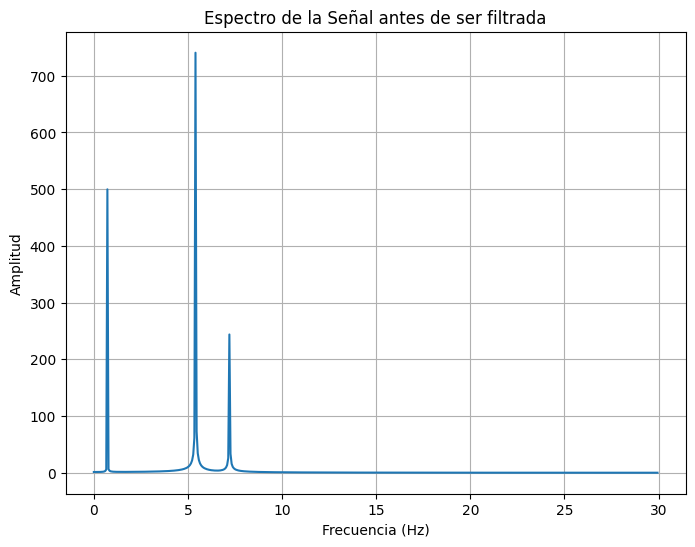

In [6]:
  import numpy as np
  import matplotlib.pyplot as plt


  # Calcular la transformada de Fourier de la señal
  freq = np.fft.fftfreq(len(data), 1 / fs)
  spectrum = np.fft.fft(data)

  # Solo graficar la mitad positiva del espectro (frecuencias no negativas)
  positive_freq_indices = freq >= 0
  freq = freq[positive_freq_indices]
  spectrum = spectrum[positive_freq_indices]

  # Calcular el espectro de amplitud
  amplitude_spectrum = np.abs(spectrum)

  # Graficar el espectro de amplitud
  plt.figure(figsize=(8, 6))
  plt.plot(freq, amplitude_spectrum)
  plt.xlabel('Frecuencia (Hz)')
  plt.ylabel('Amplitud')
  plt.title('Espectro de la Señal antes de ser filtrada')
  plt.grid(True)
  plt.show()

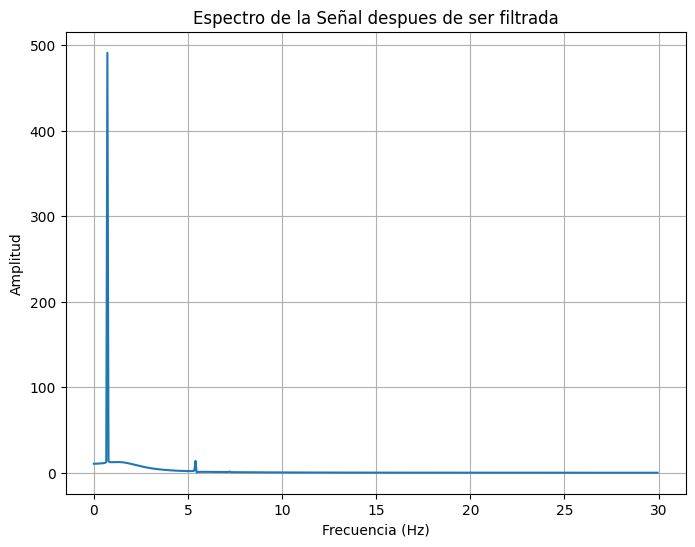

In [7]:

# Calcular la transformada de Fourier de la señal
freq = np.fft.fftfreq(len(y), 1 / fs)
spectrum = np.fft.fft(y)

# Solo graficar la mitad positiva del espectro (frecuencias no negativas)
positive_freq_indices = freq >= 0
freq = freq[positive_freq_indices]
spectrum = spectrum[positive_freq_indices]

# Calcular el espectro de amplitud
amplitude_spectrum = np.abs(spectrum)

# Graficar el espectro de amplitud
plt.figure(figsize=(8, 6))
plt.plot(freq, amplitude_spectrum)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de la Señal despues de ser filtrada')
plt.grid(True)
plt.show()

# INICIA LA SEGUNDA PARTE DEL PROYECTO

This experiment covers the Normal AM Modulation and Demodulation in the time and frequency domains.

Import necessary libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal

# Introducción: Modulación AM

En esta sección produciremos la señal AM $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ para representar la señal AM en los dominios de tiempo y la frecuencia, y estudiar el efecto de cambiar cualquiera de los parámetros involucrados.

La señal de mensaje será $m(t)=A_m cos(2 \pi f_mt)$ y la portadora $c(t)=A_c cos(2 \pi f_ct)$. Luego se produce la señal AM $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ en el dominio del tiempo.


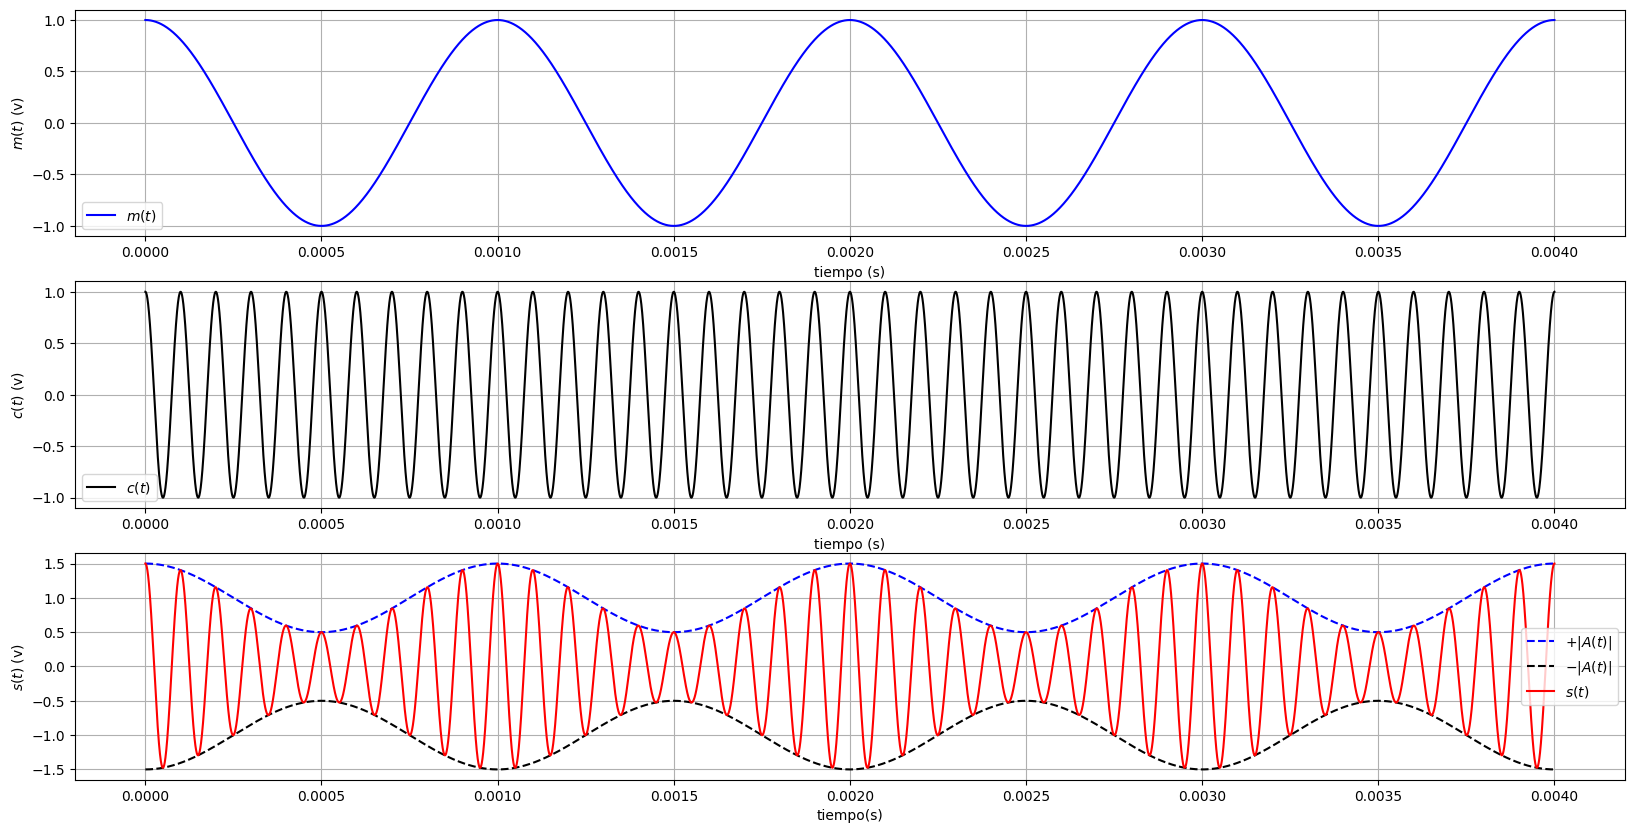

In [9]:
Am=1 # Amplitud de la señal mensaje
fm=1000 # Frecuencia de la señal mensaje
Ac=1 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.5 # Parámetro de sensibilidad de la amplitud.


## -- No es necesario modificar el código siguiente
## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Eje tiempo
mt=Am*np.cos(2*math.pi*fm*t) # Señal mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(311)
ax3 = f.add_subplot(312)
ax5 = f.add_subplot(313)

# Graficar las señales
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('tiempo (s)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()
ax1.grid()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('tiempo (s)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()
ax3.grid()

ax5.plot(t,At,'b--',label='$+|A(t)|$')
ax5.plot(t,-1*At,'k--', label='$-|A(t)|$')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('tiempo(s)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()
ax5.grid()

## ---- Dominio de la frecuencia
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=Am*np.cos(2*math.pi*fm*t) # Mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=Ac*(1+Ka*mt)


# Parámetros involucrados en la modulación AM.


Observemos la señal de mensaje $m(t)=A_ccos(2 \pi f_mt)$, la portadora $c(t)=A_ccos(2 \pi f_ct)$, y la señal AM $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ en los dominios del tiempo y de la frecuencia.

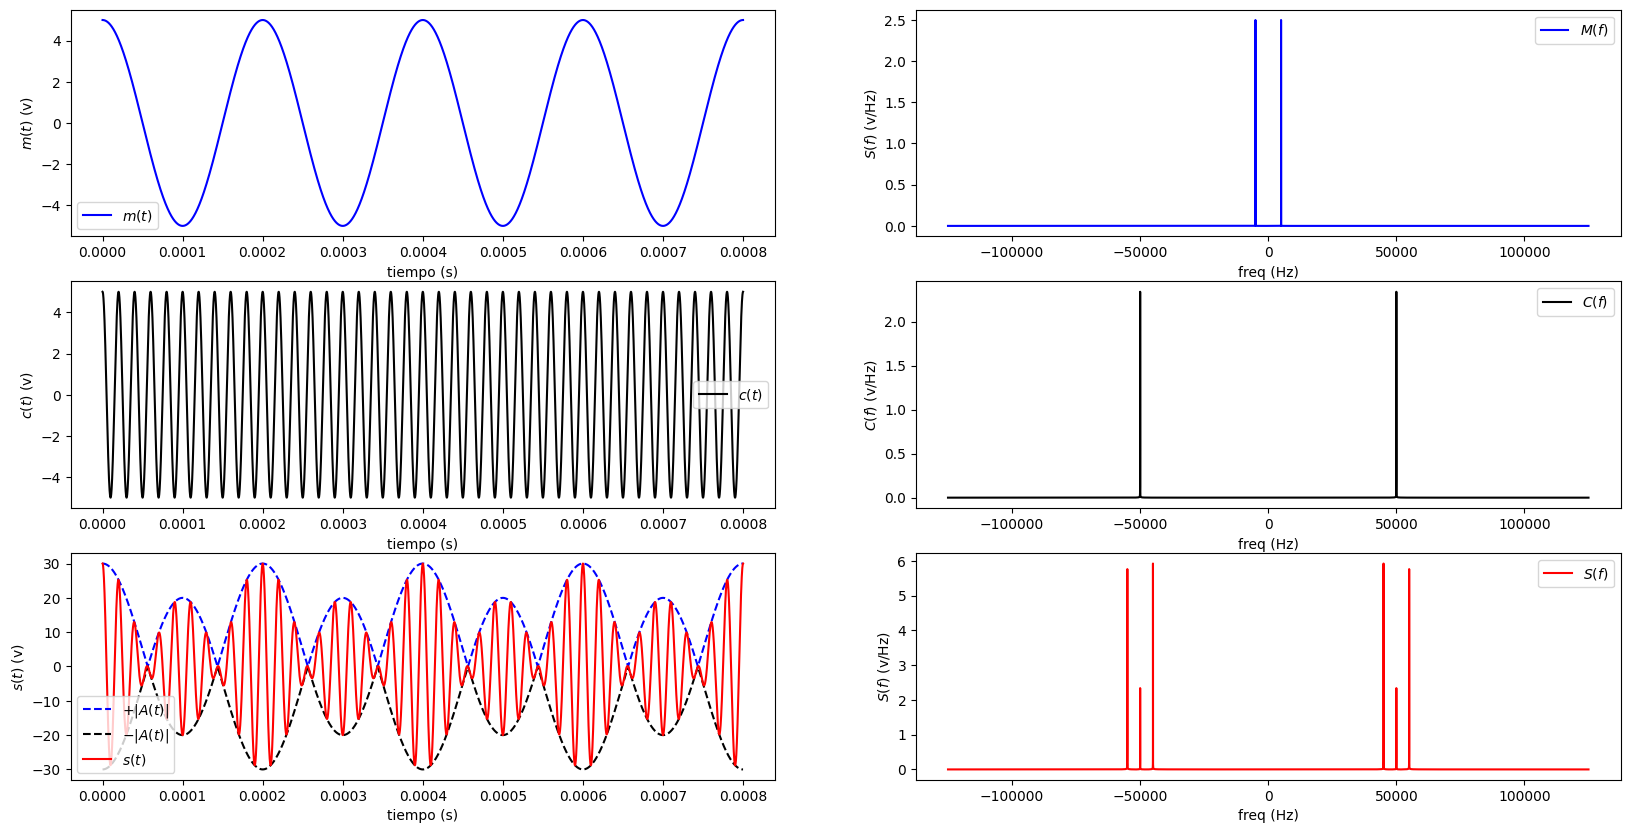

In [10]:
Am=5 # Amplitud de la señal mensaje
fm=5000 # Frecuencia de la señal mensaje
Ac=5 # Amplitud de la portadora
fc=50000 # Frecuencia de la portadora
Ka=1 # Parámetro de sensibilidad de la amplitud


## -- No es necesario modificar el código a partir de esta línea
## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Eje tiempo
mt=Am*np.cos(2*math.pi*fm*t) # Señal mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# plot the signals
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('tiempo (s)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('tiempo (s)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,At,'b--',label='$+|A(t)|$')
ax5.plot(t,-1*At,'k--', label='$-|A(t)|$')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('tiempo (s)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- Dominio de la frecuencia
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=Am*np.cos(2*math.pi*fm*t) # Señal mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=Ac*(1+Ka*mt)

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='$M(f)$')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='$C(f)$')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='$S(f)$')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()


**Ver: Ejercicios indicados en el planteamiento del proyecto**

# Efecto de cambiar el índice de modulación $\mu$

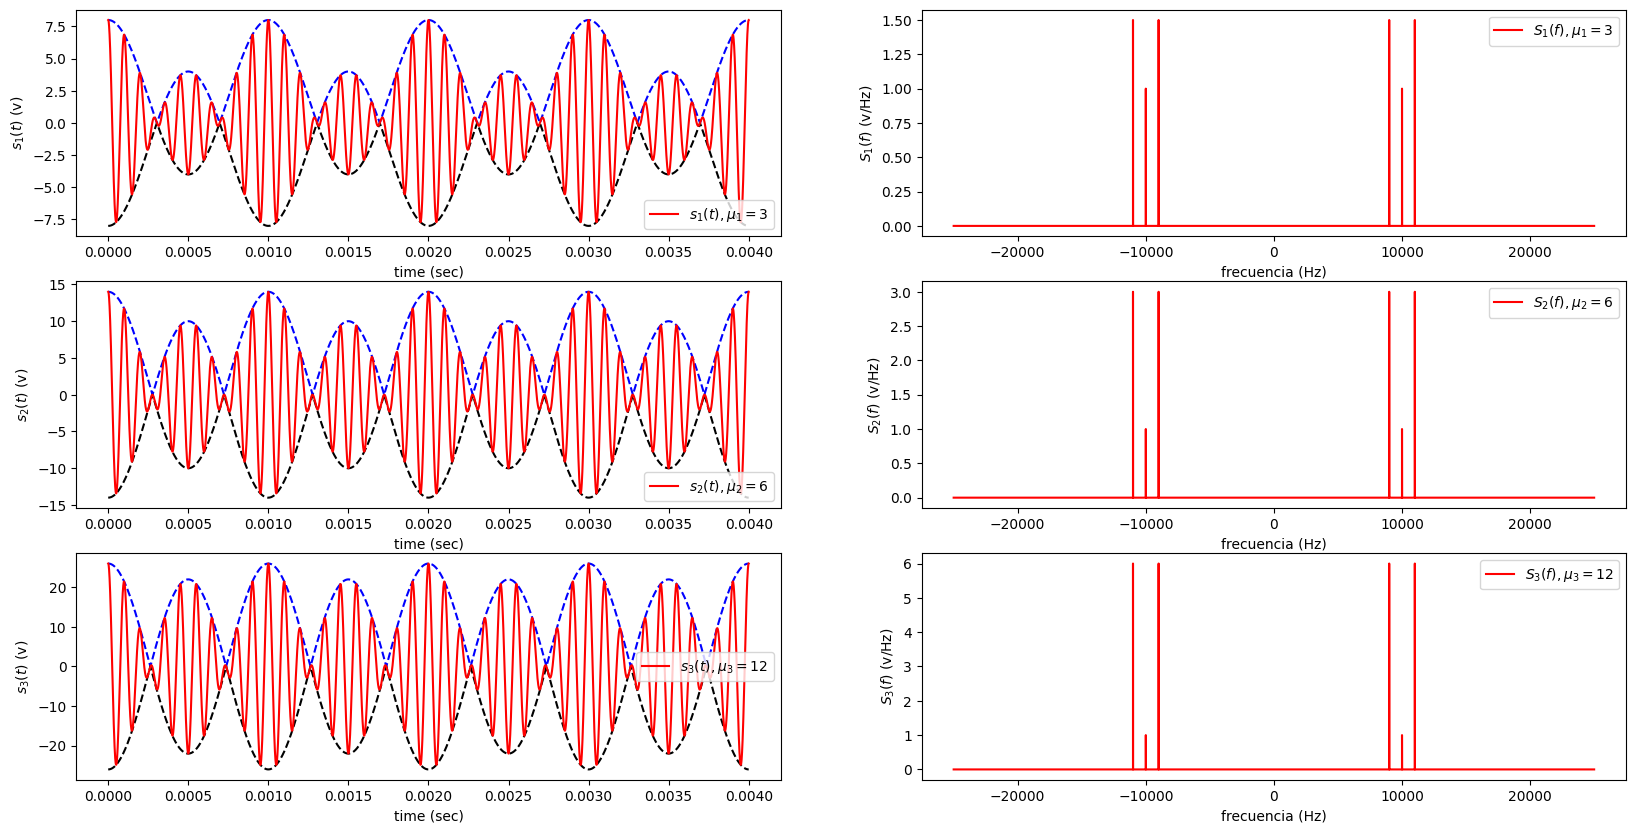

In [11]:
Am1=1  # Amplitud de la señal de mensaje 1
Am2=2 # Amplitud de la señal de mensaje 2
Am3=4 # Amplitud de la señal de mensaje 3
fm=1000 # Frecuencia de las señales mensaje

Ac=2 # Amplitud de la señal portadora
fc=10000 # Frecuencia de la señal portadora
Ka=3 # Parámetro de sensibilidad de amplitud

## -- No es necesario modificar el código después de esta línea
## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Eje tiempo
mt1=Am1*np.cos(2*math.pi*fm*t) # Señal mensaje 1
mt2=Am2*np.cos(2*math.pi*fm*t) # Señal mensaje 2
mt3=Am3*np.cos(2*math.pi*fm*t) # Señal mensaje 3
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st1=(1+Ka*mt1)*ct # Señal 1 modulada AM
st2=(1+Ka*mt2)*ct # Señal 2 modulada AM
st3=(1+Ka*mt3)*ct # Señal 3 modulada AM
At1=np.abs(Ac*(1+Ka*mt1))
At2=np.abs(Ac*(1+Ka*mt2))
At3=np.abs(Ac*(1+Ka*mt3))

mu1=Am1*Ka
mu2=Am2*Ka
mu3=Am3*Ka

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# Gráficas de las señales
ax1.plot(t,At1,'b--',)
ax1.plot(t,-1*At1,'k--')
ax1.plot(t,st1,'r', label='$s_1(t), \mu_1=$'+str(mu1))
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$s_1(t)$ (v)')
ax1.legend()

ax3.plot(t,At2,'b--')
ax3.plot(t,-1*At2,'k--')
ax3.plot(t,st2,'r',label='$s_2(t), \mu_2=$'+str(mu2))
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$s_2(t)$ (v)')
ax3.legend()

ax5.plot(t,At3,'b--')
ax5.plot(t,-1*At3,'k--')
ax5.plot(t,st3,'r',label='$s_3(t), \mu_3=$'+str(mu3))
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s_3(t)$ (v)')
ax5.legend()
## ---- Dominio de la frecuencia
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
mt1=Am1*np.cos(2*math.pi*fm*t) # Señal mensaje 1
mt2=Am2*np.cos(2*math.pi*fm*t) # Señal mensaje 2
mt3=Am3*np.cos(2*math.pi*fm*t) # Señal mensaje 3
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st1=(1+Ka*mt1)*ct # Señal 1 modulada AM
st2=(1+Ka*mt2)*ct # Señal 2 modulada AM
st3=(1+Ka*mt3)*ct # Señal 3 modulada AM
At1=np.abs(Ac*(1+Ka*mt1))
At2=np.abs(Ac*(1+Ka*mt2))
At3=np.abs(Ac*(1+Ka*mt3))

Sf1 = np.abs(np.fft.fft(st1))
freqs = np.fft.fftfreq(st1.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf1=Sf1[idx]/N
ax2.plot(freqs, Sf1,'r',label='$S_1(f), \mu_1=$'+str(mu1))
ax2.set_xlabel('frecuencia (Hz)')
ax2.set_ylabel('$S_1(f)$ (v/Hz)')
ax2.legend()

Sf2 = np.abs(np.fft.fft(st2))
freqs = np.fft.fftfreq(st2.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf2=Sf2[idx]/N
ax4.plot(freqs, Sf2,'r',label='$S_2(f), \mu_2=$'+str(mu2))
ax4.set_xlabel('frecuencia (Hz)')
ax4.set_ylabel('$S_2(f)$ (v/Hz)')
ax4.legend()

Sf3 = np.abs(np.fft.fft(st3))
freqs = np.fft.fftfreq(st3.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf3=Sf3[idx]/N
ax6.plot(freqs, Sf3,'r',label='$S_3(f), \mu_3=$'+str(mu3))
ax6.set_xlabel('frecuencia (Hz)')
ax6.set_ylabel('$S_3(f)$ (v/Hz)')
ax6.legend()

**Ver Ejercicios en el planteamiento del proyecto**

# Modulación AM de señales con múltiples componentes armónicos

Se aplicará modulación AM para la señal $X(t)=A_{m1}cos(2 \pi f_{c1}t)+A_{m2}cos(2 \pi f_{c2}t)+A_{m3}cos(2 \pi f_{c3}t)$

Función en Python para generar $m(t)$:

In [12]:
def func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t):
   m1t=Am1*np.cos(2*math.pi*fm1*t) # Componente 1
   m2t=Am2*np.cos(2*math.pi*fm2*t) # Componente 2
   m3t=Am3*np.cos(2*math.pi*fm3*t) # Componente 3
   mt=m1t+m2t+m3t # Señal combinada
   return mt

Función en Python para generar la portadora $c(t)$

In [13]:
def func_ct(Ac,fc,t):
   ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
   return ct

Función en Python para generar la modulación AM $s(t)$.

In [14]:
def Am_mod(mt,ct,Ka):
   st=(1+Ka*mt)*ct # Modulación AM
   return st

Producción y graficación de las señales en el tiempo y la frecuencia:

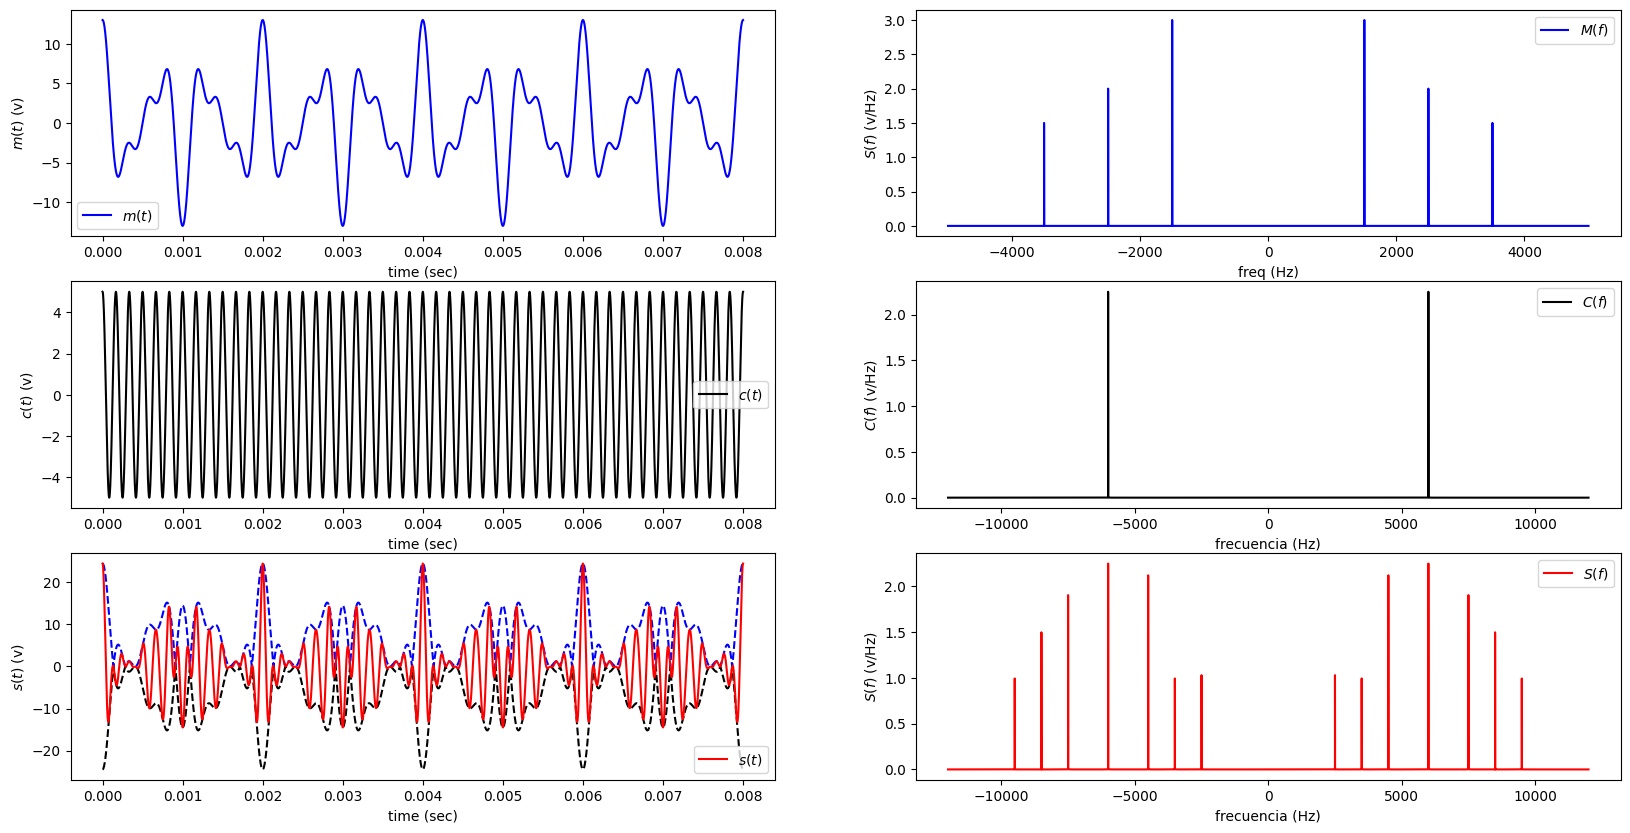

In [15]:
Am1=6 # Amplitud de la componente 1
fm1=1500 # Frecuencia de la componente 1

Am2=4 # Amplitud de la componente 2
fm2=2500 # Frecuencia de la componente 2

Am3=3 # Amplitud de la componente 3
fm3=3500 # Frecuencia de la componente 3

Ac=5 # Amplitud de la portadora
fc=6000 # Frecuencia de la portadora
Ka=0.3 # Coeficiente de sensibilidad de amplitud

fm1_3=[fm1,fm2,fm3]

## -- No es necesario modificar el código después de esta línea
## Cálculo de la frecuencia fudamental de la señal, para su graficación.
fm=np.gcd.reduce(fm1_3)

## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Señal mensaje
ct=func_ct(Ac,fc,t) # Portadora
st=Am_mod(mt,ct,Ka) # Modulación AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# Graficar las señales
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,At,'b--')
ax5.plot(t,-1*At,'k--')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- Dominio de la frecuencia
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Mensaje

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='$M(f)$')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Tstart=0; Tstop=100000/fc; Tstep=0.25/fc
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Mensaje
ct=func_ct(Ac,fc,t) # Portadora
st=Am_mod(mt,ct,Ka) # Modulación AM
At=np.abs(Ac*(1+Ka*mt))

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='$C(f)$')
ax4.set_xlabel('frecuencia (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='$S(f)$')
ax6.set_xlabel('frecuencia (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

**Ver ejercicios en el planteamiento del proyecto**